## Exploratory Data Analysis & Intro

## Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

## Exploratory Data Analysis for all Data Roles

### Roles to Explore

In [ ]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/musaidriss/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Filter for Uk Data Analyst Roles
df_DA_UK = df[(df['job_country'] == 'United Kingdom') & (df['job_title_short'] == 'Data Analyst')]

df_DA_UK

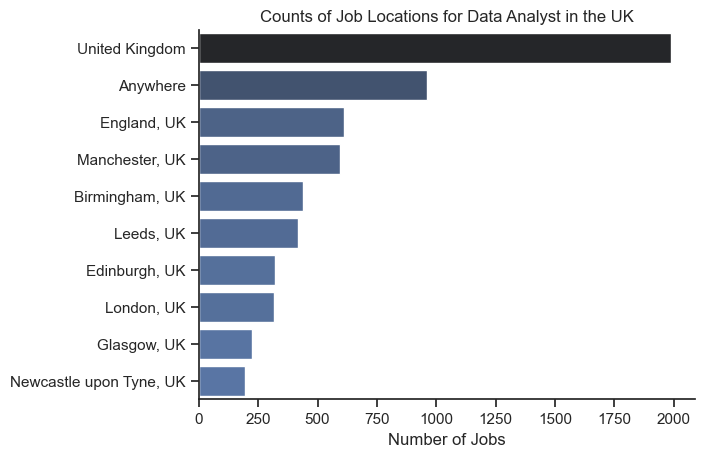

In [ ]:
df_plot = df_DA_UK['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the UK')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

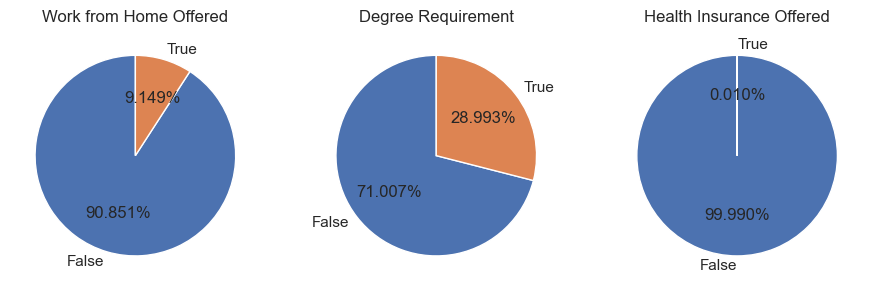

In [ ]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_UK[column].value_counts(), labels=['False', 'True'], autopct='%1.3f%%'
 , startangle=90)
    ax[i].set_title(title)

plt.show()

In [ ]:
df_DA_UK['job_health_insurance']

74        False
97        False
170       False
206       False
218       False
          ...  
784610    False
784707    False
784999    False
785061    False
785485    False
Name: job_health_insurance, Length: 10482, dtype: bool

In [ ]:
df_DA_UK['job_health_insurance'].value_counts()
# This shows the job_health_insurance in the UK is quite low.


job_health_insurance
False    10481
True         1
Name: count, dtype: int64

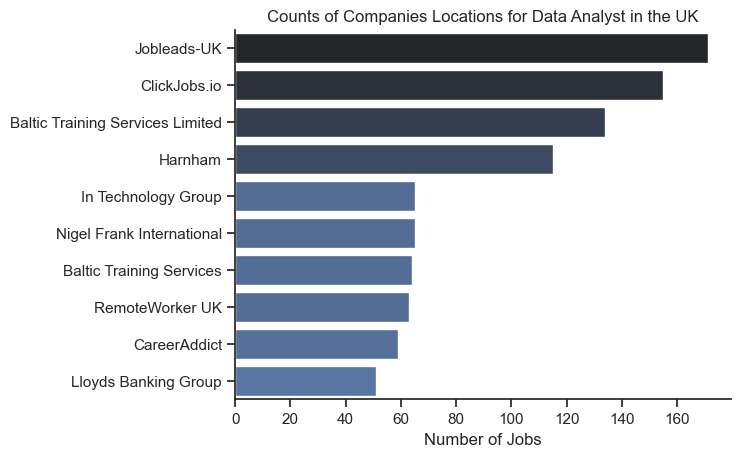

In [ ]:
df_plot = df_DA_UK['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Companies Locations for Data Analyst in the UK')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()
# Use command shift L to highlight term to change like company_name